# 배달 데이터 분석

1. 데이터탐색 <br>
2. 가설설정 <br>
3. 탐색적 자료 분석 <br>
4. 결론 

#### 1. 데이터 탐색

In [4]:
# -*- coding: utf-8 -*-

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../study data/delivery.csv'
delivery = pd.read_csv(file_path)

print(delivery.info())
print(delivery.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158324 entries, 0 to 5158323
Data columns (total 31 columns):
SERIAL_NUMBER                int64
PROCESS_DT                   object
DLVR_RQESTER_ID              object
DLVR_REQUST_STTUS_VALUE      int64
DLVR_RCEPT_CMPNY_ID          object
DLVR_STORE_ID                object
DLVR_STORE_INDUTY_NM         object
DLVR_STORE_LEGALDONG_CODE    int64
DLVR_STORE_SIDO              object
DLVR_STORE_SIGUNGU           object
DLVR_STORE_DONG              object
DLVR_STORE_RI                object
DLVR_STORE_ADSTRD_CODE       int64
DLVR_STORE_RDNMADR_CODE      float64
DLVR_DSTN_LEGALDONG_CODE     float64
DLVR_DSTN_SIDO               object
DLVR_DSTN_SIGUNGU            object
DLVR_DSTN_DONG               object
DLVR_DSTN_RI                 object
DLVR_DSTN_ADSTRD_CODE        float64
DLVR_DSTN_RDNMADR_CODE       float64
DLVR_MAN_ID                  object
DLVR_AMOUNT                  int64
CALL_RLAY_FEE_AMOUNT         int64
GOODS_AMOUNT             

In [5]:
delivery.isnull().sum()  #결측데이터 제거

SERIAL_NUMBER                      0
PROCESS_DT                         0
DLVR_RQESTER_ID                    0
DLVR_REQUST_STTUS_VALUE            0
DLVR_RCEPT_CMPNY_ID            62894
DLVR_STORE_ID                      0
DLVR_STORE_INDUTY_NM               0
DLVR_STORE_LEGALDONG_CODE          0
DLVR_STORE_SIDO                    0
DLVR_STORE_SIGUNGU                 0
DLVR_STORE_DONG                    0
DLVR_STORE_RI                4567428
DLVR_STORE_ADSTRD_CODE             0
DLVR_STORE_RDNMADR_CODE        99621
DLVR_DSTN_LEGALDONG_CODE      389543
DLVR_DSTN_SIDO                389543
DLVR_DSTN_SIGUNGU             389543
DLVR_DSTN_DONG                389543
DLVR_DSTN_RI                 4756752
DLVR_DSTN_ADSTRD_CODE         383887
DLVR_DSTN_RDNMADR_CODE        600821
DLVR_MAN_ID                        0
DLVR_AMOUNT                        0
CALL_RLAY_FEE_AMOUNT               0
GOODS_AMOUNT                       0
SETLE_KND_VALUE                    0
SETLE_CARD_CN                3541335
D

#### 가설설정  <br>

+ 주제 : 배달 전문점 오픈 추천 장소 <br>
+ 목적 : 최대한 많은 매출을 일으킬 수 있는 지역 선정과 업종 선정 <br>
+ 가설 : <br>
1) 지역에 따라 배달 총량이 다를 것이다. <br>
2) 특정 지역에 대해 배달금액 평균이 높을 것이다. <br>
3) 위의 내용을 토대로 어느 지역에서 배달 사업을 하면 좋을 지 추천한다.

#### 탐색적 자료 분석

In [6]:
sido_count = delivery['DLVR_STORE_SIDO'].value_counts()
for idx, (val,cnt) in enumerate(sido_count.iteritems(),1) :
      print("Top", idx, ":", val, cnt)

Top 1 : 경기도 3059586
Top 2 : 서울특별시 791041
Top 3 : 경상남도 266996
Top 4 : 경상북도 261268
Top 5 : 충청남도 168835
Top 6 : 전라북도 124421
Top 7 : 인천광역시 105697
Top 8 : 충청북도 94685
Top 9 : 제주특별자치도 67578
Top 10 : 대전광역시 65325
Top 11 : 대구광역시 63526
Top 12 : 전라남도 34143
Top 13 : 부산광역시 31279
Top 14 : 강원도 12703
Top 15 : 광주광역시 11241


In [7]:
sales_no = delivery[['SERIAL_NUMBER', 'DLVR_STORE_SIGUNGU']].groupby(by=['DLVR_STORE_SIGUNGU'], as_index=False) \
                .count()[:10] \
                .sort_values(['SERIAL_NUMBER'], ascending = False)\

In [8]:
sales_no

,DLVR_STORE_SIGUNGU,SERIAL_NUMBER
7,광명시,307643
3,고양시 덕양구,216288
1,경산시,45316
9,광주시,35304
5,고양시 일산서구,32566
0,강서구,27143
6,관악구,25763
8,광양시,13436
2,경주시,8211
4,고양시 일산동구,3635


+ 도시 중에서는 경기도가, 시군구 기준에서는 광명시, 덕양구의 배달 건수가 많다.

In [9]:
delivery = delivery.astype({'PROCESS_DT':'datetime64'})
print(delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158324 entries, 0 to 5158323
Data columns (total 31 columns):
SERIAL_NUMBER                int64
PROCESS_DT                   datetime64[ns]
DLVR_RQESTER_ID              object
DLVR_REQUST_STTUS_VALUE      int64
DLVR_RCEPT_CMPNY_ID          object
DLVR_STORE_ID                object
DLVR_STORE_INDUTY_NM         object
DLVR_STORE_LEGALDONG_CODE    int64
DLVR_STORE_SIDO              object
DLVR_STORE_SIGUNGU           object
DLVR_STORE_DONG              object
DLVR_STORE_RI                object
DLVR_STORE_ADSTRD_CODE       int64
DLVR_STORE_RDNMADR_CODE      float64
DLVR_DSTN_LEGALDONG_CODE     float64
DLVR_DSTN_SIDO               object
DLVR_DSTN_SIGUNGU            object
DLVR_DSTN_DONG               object
DLVR_DSTN_RI                 object
DLVR_DSTN_ADSTRD_CODE        float64
DLVR_DSTN_RDNMADR_CODE       float64
DLVR_MAN_ID                  object
DLVR_AMOUNT                  int64
CALL_RLAY_FEE_AMOUNT         int64
GOODS_AMOUNT     

In [10]:
dt = delivery['PROCESS_DT'].dt.date
print(dt.min())
print(dt.max())

2020-01-01
2020-06-21


In [11]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

## 하고 싶었던 것 : 날짜별, 도시별 증감추이 그래프 그리기 ㅠㅠ <br>

from fbprophet import Prophet
from datetime import datetime

df = pd.DataFrame({'x':dt, 'y':delivery['DLVR_STORE_SIDO']})
df.reset_index(inplace=True)
df['x'] = pd.to_datetime(df['x'])
del delivery['PROCESS_DT']

m=Prophet(monthly_seasonality=True)
m.fit(df);

In [12]:
amount = delivery[['GOODS_AMOUNT', 'DLVR_STORE_SIDO']].groupby(by=['DLVR_STORE_SIDO'], as_index=False) \
                .mean() \
                .sort_values(['GOODS_AMOUNT'], ascending = False)\

In [13]:
amount

,DLVR_STORE_SIDO,GOODS_AMOUNT
11,전라북도,25566.707123
12,제주특별자치도,24136.342404
1,경기도,24041.213203
3,경상북도,23717.839556
14,충청북도,23677.104114
2,경상남도,23500.703029
13,충청남도,23163.617419
10,전라남도,22922.379521
8,서울특별시,22605.785976
9,인천광역시,21908.043776


In [14]:
sales_mean = delivery[['GOODS_AMOUNT', 'DLVR_STORE_SIGUNGU']].groupby(by=['DLVR_STORE_SIGUNGU'], as_index=False) \
                .mean()[:10] \
                .sort_values(['GOODS_AMOUNT'], ascending = False)\

In [15]:
sales_mean

,DLVR_STORE_SIGUNGU,GOODS_AMOUNT
7,광명시,26716.600504
9,광주시,26654.647660
5,고양시 일산서구,25013.546951
2,경주시,24592.120570
4,고양시 일산동구,24238.834938
8,광양시,24111.469113
3,고양시 덕양구,23720.507652
1,경산시,22425.164798
0,강서구,21674.402940
6,관악구,18492.420914


In [16]:
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


Text(0,0.5,'평균금액')

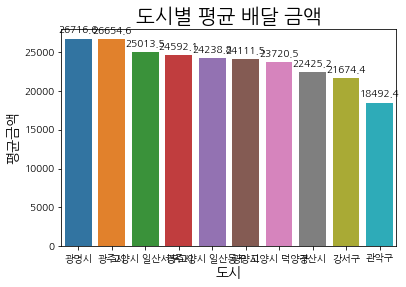

In [17]:
splot = sns.barplot(x='DLVR_STORE_SIGUNGU', y='GOODS_AMOUNT', data=sales_mean)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("도시별 평균 배달 금액", size=20)
plt.xlabel("도시", size=14)
plt.ylabel("평균금액", size=14)

In [18]:
sales_no = delivery[['SERIAL_NUMBER', 'DLVR_STORE_SIGUNGU']].groupby(by=['DLVR_STORE_SIGUNGU'], as_index=False) \
                .count()[:10] \
                .sort_values(['SERIAL_NUMBER'], ascending = False)\

In [19]:
sales_no

,DLVR_STORE_SIGUNGU,SERIAL_NUMBER
7,광명시,307643
3,고양시 덕양구,216288
1,경산시,45316
9,광주시,35304
5,고양시 일산서구,32566
0,강서구,27143
6,관악구,25763
8,광양시,13436
2,경주시,8211
4,고양시 일산동구,3635


Text(0,0.5,'배달횟수')

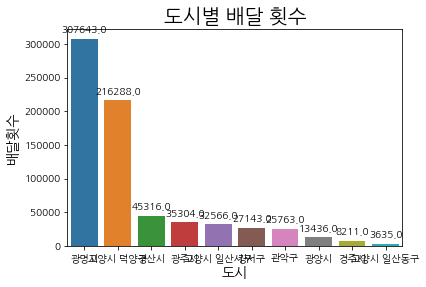

In [20]:
splot = sns.barplot(x='DLVR_STORE_SIGUNGU', y='SERIAL_NUMBER', data=sales_no)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("도시별 배달 횟수", size=20)
plt.xlabel("도시", size=14)
plt.ylabel("배달횟수", size=14)

+ 총 배달 건수와 금액을 종합해 보면 광명시에서 사업을 오픈하는 것이 가장 성공할 확률이 높다.

In [28]:
industry = delivery[['SERIAL_NUMBER', 'DLVR_STORE_INDUTY_NM']].groupby(by=['DLVR_STORE_INDUTY_NM'], as_index=False) \
                .count()[:10] \
                .sort_values(['SERIAL_NUMBER'], ascending = False)\

In [29]:
industry

,DLVR_STORE_INDUTY_NM,SERIAL_NUMBER
3,분식,626945
7,족발/보쌈,415060
1,돈까스/일식,251112
6,야식,226043
9,찜탕,214388
8,중식,187030
5,아시안/양식,109185
2,배달전문업체,94837
0,도시락,49254
4,심부름,5344


## 결론 : 광명시에서 분식 사업을 오픈하는 것이 가장 성공할 확률이 높다.